<a href="https://colab.research.google.com/github/bahadirbesirkestane/Staj/blob/main/Gun12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Yapay Sinir Ağları**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [ ]:
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=10, max_iter=10000,random_state=0).fit(X_train,y_train)

In [ ]:
from sklearn.datasets import load_breast_cancer
kanser=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(kanser.data,kanser.target,random_state=0)

In [ ]:
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

MLPClassifier(random_state=42)

In [ ]:
print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

0.9389671361502347
0.916083916083916


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
x_train_scaled=scaler.transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [ ]:
mlp=MLPClassifier(max_iter=1000,random_state=42)
mlp.fit(x_train_scaled,y_train)
print(mlp.score(x_train_scaled,y_train))
print(mlp.score(x_test_scaled,y_test))

0.9976525821596244
0.951048951048951


In [ ]:
#alpha=1
mlp=MLPClassifier(alpha=1,max_iter=1000,random_state=42)
mlp.fit(x_train_scaled,y_train)
print(mlp.score(x_train_scaled,y_train))
print(mlp.score(x_test_scaled,y_test))

0.9882629107981221
0.9790209790209791


## **Temel Bileşenler Analizi(PCA)**


In [ ]:
import numpy as np

In [ ]:
rng=np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.randn(2,200)).T
X.shape

(200, 2)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

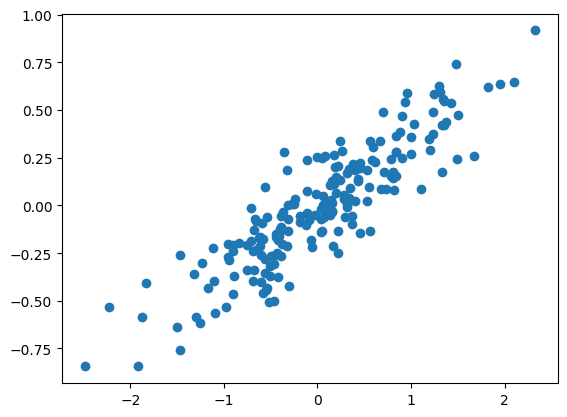

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
print(pca.components_)
print(pca.explained_variance_)


[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


**Boyut İndirgeme**

In [ ]:
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)

In [ ]:
print(X.shape)
print(X_pca.shape)

(200, 2)
(200, 1)


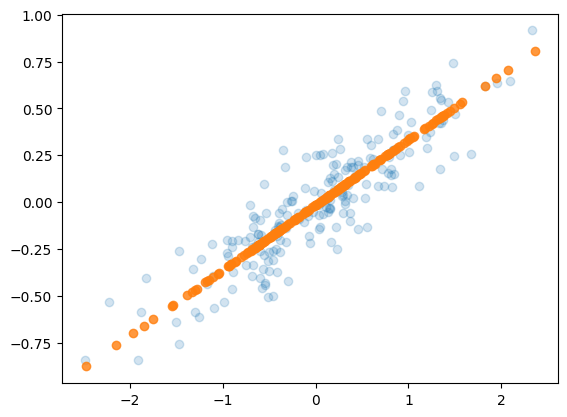

In [ ]:
X_yeni=pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_yeni[:,0],X_yeni[:,1],alpha=0.8)


>Orjinal veri ve boyutu azaltılmış verinin grafiği.
Açık mavi noktalar orjinal. Turuncu noktalar boyutu indergenmiş verilerdir.

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()
digits.data.shape

(1797, 64)

In [ ]:
pca=PCA(2)

In [ ]:
data_pca=pca.fit_transform(digits.data)
data_pca.shape

(1797, 2)

>Veri 2 Boyuta indirgendi

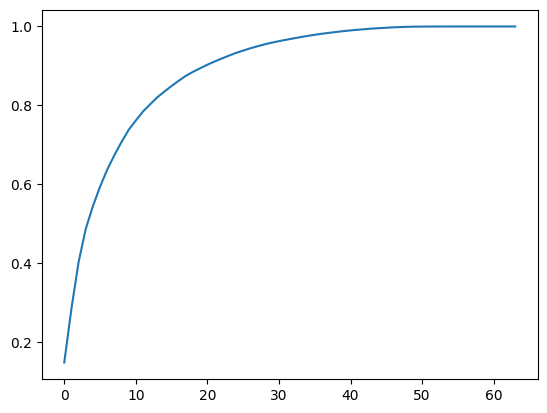

In [ ]:
pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

>Grafikte Görüldüğü gibi veriyi 2 boyuta indirgediğimiz için veri kaybı çok oldu.

##**Manifold Öğrenme**
Manifold öğrenme ile yüksek boyutlu veriler düşük boyutlarda tanımlanabilir.

**t-SNE**

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(digits.data)

>Model Kuruldu

In [ ]:
digits_pca=pca.transform(digits.data)

>Veri Seti Dönüştürüldü

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

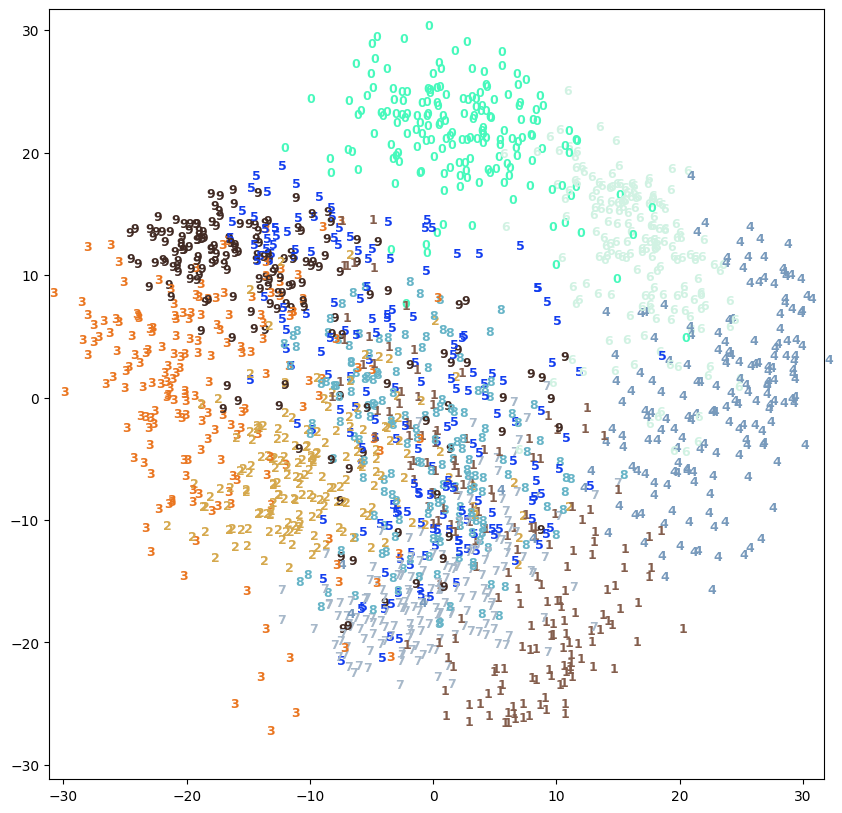

In [ ]:
renkler=["#47F9BC","#845E4D","#D5A84C","#EA751F","#789ABC","#123DEF",
         "#D1F2E3","#A7B8C9","#66B4C7","#412A23"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,0].min(),digits_pca[:,0].max())

for i in range(len(digits.data)):
  plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i],),
           color=renkler[digits.target[i]],
          fontdict={'weight':'bold','size':9})


>0, 6 ve 4 rakamı diğerlerine göre daha iyi ayrılmış. Diğer veriler üst üste binmiş.


In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(random_state=42)
digits_tsne=tsne.fit_transform(digits.data)

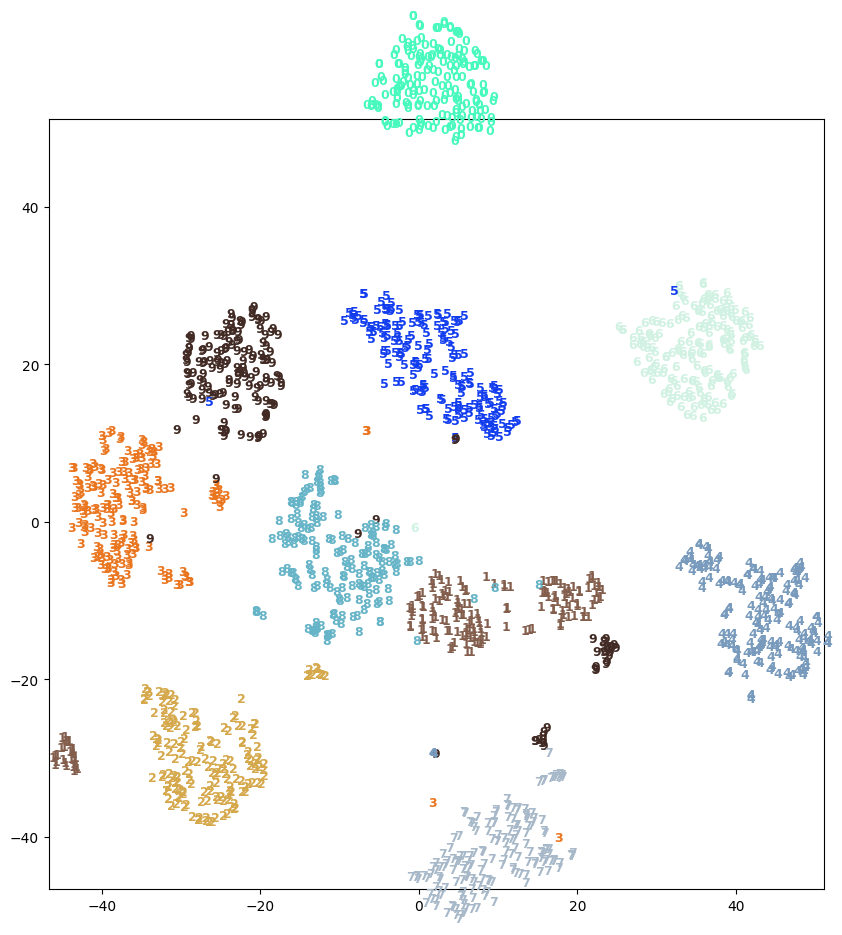

In [ ]:
renkler=["#47F9BC","#845E4D","#D5A84C","#EA751F","#789ABC","#123DEF",
         "#D1F2E3","#A7B8C9","#66B4C7","#412A23"]
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,0].min(),digits_tsne[:,0].max())

for i in range(len(digits.data)):
  plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i],),
           color=renkler[digits.target[i]],
          fontdict={'weight':'bold','size':9})

>Manifold öğrneme, temel bileşenler analizine göre verilerde eksiklk oldğunda doğru sonuçlar vermez. Manifold öğrenmenin avantajı lineer olmayan verisetlerinde iyi çalışır.

##**Gaussian Mixture Model**
K-Means Kümelemenin genişletilmiş hali olarak düşünülebilir.

k-Means Kümelemenin zayıf yönleri

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X,y_true=make_blobs(n_samples=400,centers=4,cluster_std=0.60,random_state=0)

#Modelin daha iyi gözükmesi için eksenlerin yer değiştirmesi.
X=X[:,::-1]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(4,random_state=0)
labels=kmeans.fit(X).predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


>Tahminler yapıldı.

In [ ]:
import matplotlib.pyplot as plt

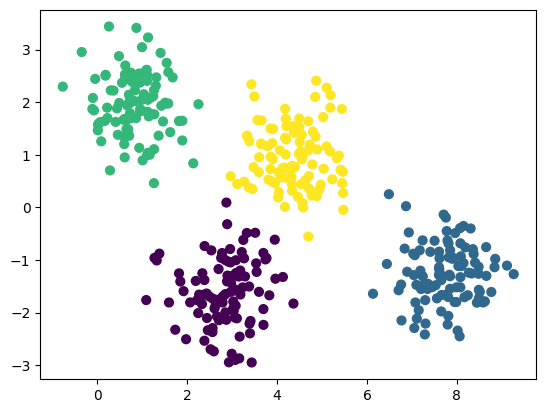

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

>Burada grupların kümelemesinde k-means ile doğru ayrım yapılamadı. K-Means kümeleme esnek değildir.

**Gaussian Model**

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm=GaussianMixture(n_components=4).fit(X)
labels=gmm.predict(X)

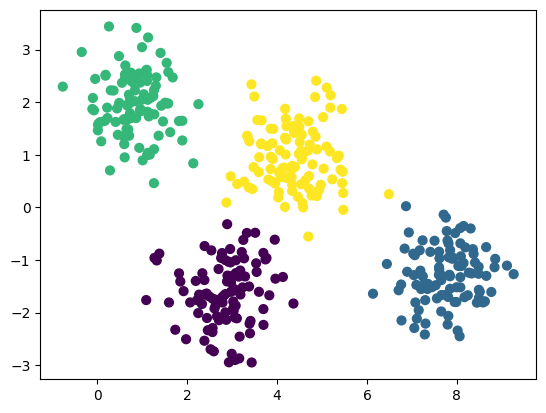

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

>Kümeler Daha iyi Ayrıldı

In [ ]:
probs=gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.469 0.    0.531]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


>Gauissian da çeşitli küme kapsayıcıları vardır. Sadece daire şeklinde değil elips şeklinde de olablir.

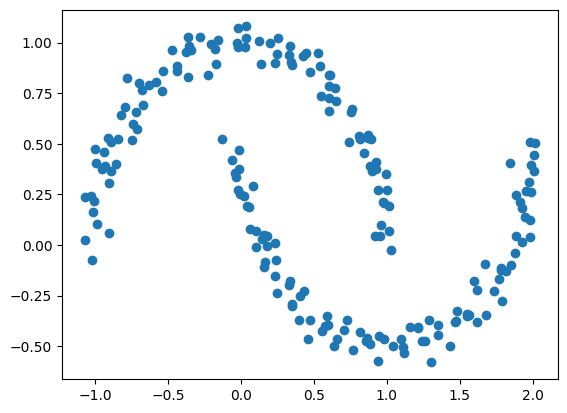

In [ ]:
from sklearn.datasets import make_moons
X_moons,y_moons=make_moons(200,noise=0.05,random_state=0)

plt.scatter(X_moons[:,0],X_moons[:,1])

In [ ]:
gmm2=GaussianMixture(n_components=2,covariance_type='full',random_state=0)

In [ ]:
gmm16=GaussianMixture(n_components=16,covariance_type='full',random_state=0)

In [ ]:
import numpy as np

n_components=np.arange(1,21)
models=[GaussianMixture(n,covariance_type='full',
                        random_state=0).fit(X_moons) for n in n_components]

Text(0.5, 0, 'n_components')

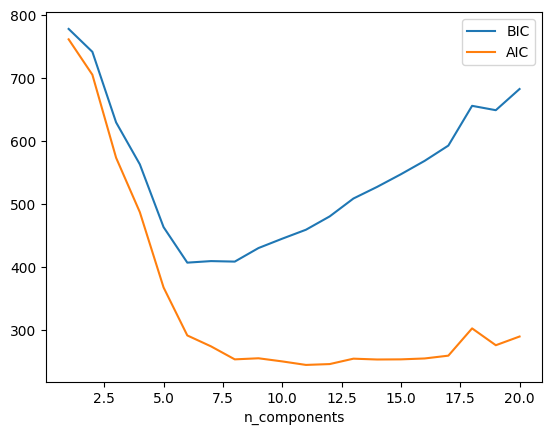

In [ ]:
plt.plot(n_components,[m.bic(X_moons) for m in models],label='BIC')
plt.plot(n_components,[m.aic(X_moons) for m in models],label='AIC')
plt.legend(loc="best")
plt.xlabel('n_components')

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA
data = pca.fit_transform(digits.data)
data.shape


(1797, 2)

>PCA ile boyutu 2 ye düşürdük.

In [ ]:
c_components=np.arange(50,210,10)
models=[GaussianMixture(n,covariance_type='full',
                        random_state=0) for n in n_components]

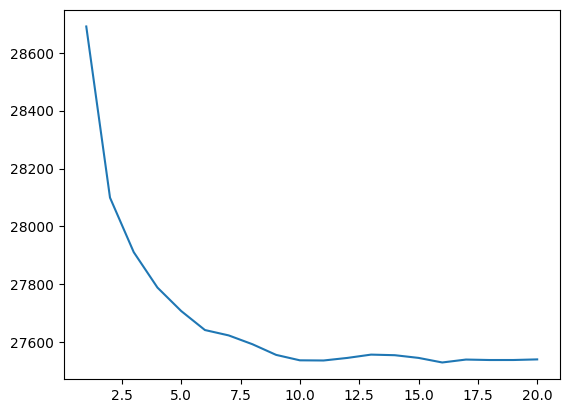

In [ ]:
aics=[model.fit(data).aic(data) for model in models ]
plt.plot(n_components,aics)

In [ ]:
gmm=GaussianMixture(110,covariance_type='full',random_state=0).fit(data)

data_new=gmm.sample(100)

##**Model İyileştirme**
**Grid Search:**
Modelin performansını en iyi şekilde etkileyen parametreyi bulmak için kullanılır. Grid Serach, Cross Validation ile beraber uygulandığında çok daha iyi sonuçlar elde edilecektir.


In [100]:
from sklearn.datasets import load_digits
digits=load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

>Parametrelerin belirlenmesi.

In [119]:
param_grid=[{'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]},
            {'kernel':['linear'],'C':[1,10,100,1000]}]

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [122]:
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=0)

>Modeiln Kurulması

In [124]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [125]:
grid_search.score(X_test,y_test)

0.9933333333333333

>En iyi parametreler

In [126]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [127]:
grid_search.best_score_

0.9918353297535452

In [128]:
grid_search.best_estimator_

SVC(C=10, gamma=0.001)

>Diğer parametler ile oluşturulan score lar

In [129]:
grid_search.cv_results_

{'mean_fit_time': array([0.0481101 , 0.0410264 , 0.04494672, 0.02608566, 0.04438987,
        0.0242835 , 0.0472527 , 0.02322879, 0.01884346, 0.01917329,
        0.02166996, 0.01835613]),
 'std_fit_time': array([0.00352343, 0.00411704, 0.00099239, 0.00563693, 0.00143876,
        0.00274275, 0.00281226, 0.00030314, 0.00052117, 0.00144623,
        0.00435622, 0.00063663]),
 'mean_score_time': array([0.01649594, 0.02269659, 0.01718884, 0.01170263, 0.01656351,
        0.01103125, 0.01597638, 0.01093163, 0.0049087 , 0.00536036,
        0.00537324, 0.00505395]),
 'std_score_time': array([0.00067445, 0.00315999, 0.0022911 , 0.0002404 , 0.00052051,
        0.00016415, 0.00070524, 0.00024762, 0.0001167 , 0.00105997,
        0.0003762 , 0.00031884]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dt

>Sonucları Tablo haline getiriyoruz.

In [130]:
import pandas as pd

sonuclar=pd.DataFrame(grid_search.cv_results_)
sonuclar

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048110,0.003523,0.016496,0.000674,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.992593,0.992593,0.988848,0.985130,0.996283,0.991089,0.003795,4
1,0.041026,0.004117,0.022697,0.003160,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.966667,0.974074,0.962825,0.970260,0.981413,0.971048,0.006388,12
2,0.044947,0.000992,0.017189,0.002291,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.988889,0.992593,0.992565,0.988848,0.996283,0.991835,0.002775,1
3,0.026086,0.005637,0.011703,0.000240,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.985185,0.992593,0.981413,0.981413,0.996283,0.987377,0.006041,7
4,0.044390,0.001439,0.016564,0.000521,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.988889,0.992593,0.992565,0.988848,0.996283,0.991835,0.002775,1
5,0.024284,0.002743,0.011031,0.000164,100,0.0001,rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.985185,0.988889,0.981413,0.985130,1.000000,0.988123,0.006392,5
6,0.047253,0.002812,0.015976,0.000705,1000,0.001,rbf,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",0.988889,0.992593,0.992565,0.988848,0.996283,0.991835,0.002775,1
7,0.023229,0.000303,0.010932,0.000248,1000,0.0001,rbf,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.985185,0.988889,0.981413,0.985130,1.000000,0.988123,0.006392,5
8,0.018843,0.000521,0.004909,0.000117,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",0.981481,0.970370,0.977695,0.981413,0.996283,0.981448,0.008448,8
9,0.019173,0.001446,0.005360,0.001060,10,NaN,linear,"{'C': 10, 'kernel': 'linear'}",0.981481,0.970370,0.977695,0.981413,0.996283,0.981448,0.008448,8


In [131]:
sonuclar.T

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.04811,0.041026,0.044947,0.026086,0.04439,0.024284,0.047253,0.023229,0.018843,0.019173,0.02167,0.018356
std_fit_time,0.003523,0.004117,0.000992,0.005637,0.001439,0.002743,0.002812,0.000303,0.000521,0.001446,0.004356,0.000637
mean_score_time,0.016496,0.022697,0.017189,0.011703,0.016564,0.011031,0.015976,0.010932,0.004909,0.00536,0.005373,0.005054
std_score_time,0.000674,0.00316,0.002291,0.00024,0.000521,0.000164,0.000705,0.000248,0.000117,0.00106,0.000376,0.000319
param_C,1,1,10,10,100,100,1000,1000,1,10,100,1000
param_gamma,0.001,0.0001,0.001,0.0001,0.001,0.0001,0.001,0.0001,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear
params,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}","{'C': 1000, 'kernel': 'linear'}"
split0_test_score,0.992593,0.966667,0.988889,0.985185,0.988889,0.985185,0.988889,0.985185,0.981481,0.981481,0.981481,0.981481
split1_test_score,0.992593,0.974074,0.992593,0.992593,0.992593,0.988889,0.992593,0.988889,0.97037,0.97037,0.97037,0.97037


**Nested Cross Validation** **(iç içe)**

In [134]:
from sklearn.model_selection import cross_val_score
skor=cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),digits.data,digits.target,cv=5)
skor

array([0.97777778, 0.95      , 0.98328691, 0.98607242, 0.9637883 ])

In [135]:
#Skorların ortalaması
skor.mean()

0.972185082017951